# Błędy numeryczne

Zagadnienia:
* Reprezentacja liczb w komputerze:
    * Zapis stałoprzecinkowy,
    * Zapis zmiennoprzecinkowy (standard IEEE 754),
* Błędy numeryczne:
    * Błąd względny i bezwzględny.
    * Błąd zaokrąglenia (ang. *round-off error*).
    * Błąd obcięcia (ang. *truncation error*).
    * Błędy związane z przyjętym sposobem rozwiązywania.

## Błąd względny i bezwzględny

***Zadanie 1.***  
Liczbę $\textrm{e}$ możemy zdefiniować jako $\sum\limits_{n=0}^{\infty} \frac{1}{n!}$. Oblicz błąd względny i bezwzględny aproksymacji liczby $\textrm{e}$ poprzez $\textrm{e}^{*}$ w przypadku gdy:  
* $\textrm{e}_1^{*}=\sum\limits_{n=0}^{5} \frac{1}{n!}$    

* $\textrm{e}_2^{*}=\sum\limits_{n=0}^{10} \frac{1}{n!}$  

* $\textrm{e}_3^{*}=\sum\limits_{n=0}^{20} \frac{1}{n!}$  

In [22]:
import numpy as np
import math as Math

num_of_terms = [5, 10, 20, 1000]

for num in num_of_terms:
    e = sum(1 / Math.factorial(j) for j in range(0, num+1))
    print(f"e with {num} terms: {e}, real e: {Math.e}, difference: {abs(e - Math.e)}")
    print(f"relative difference: {abs(e - Math.e) / Math.e}")
    print("--------------------------------")


e with 5 terms: 2.716666666666667, real e: 2.718281828459045, difference: 0.0016151617923783057
relative difference: 0.0005941848175815963
--------------------------------
e with 10 terms: 2.7182818011463845, real e: 2.718281828459045, difference: 2.7312660577649694e-08
relative difference: 1.0047766310211053e-08
--------------------------------
e with 20 terms: 2.718281828459045, real e: 2.718281828459045, difference: 0.0
relative difference: 0.0
--------------------------------
e with 1000 terms: 2.718281828459045, real e: 2.718281828459045, difference: 0.0
relative difference: 0.0
--------------------------------


## Zapis zmiennoprzecinkowy

**Uwaga**: Używane tu pojęcie **cecha** ma inne znaczenie, niż poznane być może w szkole – skrótowo: „część całkowita”. Dlatego poniżej dodawane jest inne określenie – „wykładnik”.

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import sys

In [24]:
print(np.finfo(float))
eps = np.finfo(float).eps
eps

Machine parameters for float64
---------------------------------------------------------------
precision =  15   resolution = 1.0000000000000001e-15
machep =    -52   eps =        2.2204460492503131e-16
negep =     -53   epsneg =     1.1102230246251565e-16
minexp =  -1022   tiny =       2.2250738585072014e-308
maxexp =   1024   max =        1.7976931348623157e+308
nexp =       11   min =        -max
smallest_normal = 2.2250738585072014e-308   smallest_subnormal = 4.9406564584124654e-324
---------------------------------------------------------------



np.float64(2.220446049250313e-16)

***Zadanie 2.***


a) Wstaw dowolną wartość do liczby x, np. 0.1. Które liczby mają tę samą mantysę, a które tę samą cechę (wykładnik)? Sprawdź wypisując ich wartości w formacie hex.


**Uwaga:** Do odczytania liczby w formacie szesnastkowym możesz wykorzystać funkcję:

In [25]:
(1.25.hex(), 1.2.hex(), 3.0.hex(), 9.250.hex(), 9.478423.hex())

('0x1.4000000000000p+0',
 '0x1.3333333333333p+0',
 '0x1.8000000000000p+1',
 '0x1.2800000000000p+3',
 '0x1.2f4f3dc054ef4p+3')

In [26]:
5000.0.hex()

'0x1.3880000000000p+12'

lub

In [27]:
import struct
def double_to_hex(f):
    print(hex(struct.unpack('<Q', struct.pack('<d', f))[0]))

In [28]:
double_to_hex(1.25)

0x3ff4000000000000


Zamianę w drugą stronę można przeprowadzić za pomocą funkcji *int*

In [29]:
int('3ff', 16)

1023



b) Porównaj zapis liczb 0.1, 0.2 i 0.3 w formacie zmiennoprzecinkowym.

* Czy można przewidzieć, czy suma 0.1 + 0.2 będzie reprezentowana dokładnie tak samo jak liczba 0.3?
* Jaki będzie wynik porównania tej sumy z liczbą 0.3 i konsekwencje użycia warunku równościowego / nierównościowego w pętli?



In [30]:
print(0.1.hex(), 0.2.hex(), 0.3.hex())

if 0.1 + 0.2 == 0.3:
    print("Equal")
else:
    print("Not equal")

0x1.999999999999ap-4 0x1.999999999999ap-3 0x1.3333333333333p-2
Not equal


c) Przyjmijmy, że „skrótowe” określenie *liczba dokładnie reprezentowana* oznacza liczbę, która jest reprezentowana w formacie zmiennoprzecinkowym dokładnie, tzn. bez konieczności zaokrąglania.
* Ile jest liczb dokładnie reprezentowanych w przedziale $[1, 2)$?
* Zaobserwuj (z pomocą formatu hex) jakie wartości mają bity w polu mantysy w przypadku liczby 1.0.
* Jaką liczbę trzeba dodać do 1.0, aby tylko na najmłodszej pozycji pola mantysy pojawiło się 1?
* Czy wyżej otrzymana suma jest najmniejszą liczbą dokładnie reprezentowana, spośród liczb większych od 1?
* Jak przypuszczasz, jakie wartości będą miały poszczególne bity mantysy w przypadku największej liczby dokładnie reprezentowanej, której cecha (wykładnik) jest równy 0? Sprawdź, czy tak jest rzeczywiście – wpisując wartość tej liczby (jaka to jest wartość?).


In [31]:
# 1) 0 probably
# 2) 
print(1.0.hex())
# 3) 2^-52
# 4) tak
print((2-2**-52).hex())
print((1-2**-52).hex())

# ???

0x1.0000000000000p+0
0x1.fffffffffffffp+0
0x1.ffffffffffffep-1


d) Oblicz długości przedziałów, do których należą wszystkie liczby mające cechę (wykładnik) równy: 0, 1, 2, 5, -1, -3.

* Czy w każdym z tych przedziałów jest tyle samo liczb dokładnie reprezentowanych? Jeżeli nie, to ile w każdym z nich?
* Jaka jest odległość między dwoma sąsiednimi liczbami dokładnie reprezentowanymi (odległość, czyli różnica ich wartości) w każdym z tych przedziałów?
* Jaki jest maksymalny błąd bezwzględny zaokrąglenia w każdym z tych przedziałów?
* Jaki jest maksymalny błąd względny zaokrąglenia w każdym z tych przedziałów?





In [32]:
# 1) 
# 2) 2^-52
# 3) 2^-51
# 4) const ????

***Zadanie 3.***

Spójrz na poniższe zjawiska, zastanów się nad ich przyczynami.

***Problem skali***

Jaki wynika da poniższy kod:

In [33]:
a = 1.0
b = 0.0000000000000000000000001
c = a + b
print(f'{c:.20f}')
print(f'{c:.30f}')

1.00000000000000000000
1.000000000000000000000000000000


***Problem reprezentacji w zapisie binarnym*** 

In [34]:
if 0.1+0.2==0.3:
    print("True")
else:
    print("False")

False


In [35]:
suma = 0
for i in range(0,100):
    suma += 0.1
print(f'{suma:.15f}')

9.999999999999980


**Zadanie 4.**

Niech:
* $a=0.3$
* $b=10^{-13}$
* $c=a-b$
* $d=a-c$

Czy $b$ i $d$ są sobie równe w sensie analitycznym? Co z przypadkiem numerycznym? Zdefiniuj odpowiednie zmienne i porównaj wyniki. Porównaj szesnastkowe i dziesietne reprezentacje zmiennych `b` i `d`. Ile cyfr w reprezentacji `d` możemy uznać za wiarygodne?

In [36]:
# w ananiltycznym tak
a = 0.3
b = 10**-13
c = a - b
d = a - c

if d == b:
    print("True")
else:
    print("False")

# w numerycznym wiadomo nie

(b.hex(), d.hex())

False


('0x1.c25c268497682p-44', '0x1.c240000000000p-44')

**Zadanie 5.**

Rozważmy macierz kwadratową:
$$ A=\left[\begin{array}{ccc}
\sqrt{2} & \frac{1}{7}\\
\pi\sqrt{2} &\frac{\pi}{7}\\
\end{array}\right]
$$
* Czy jest to macierz osobliwa? Jak to sprawdzić?
* Oblicz wyznacznik tej macierzy w sposób analityczny i numeryczny (`np.linalg.det`). Czy otrzymałeś te same wartości? Czy wyniki obliczeń numerycznych prowadzą do poprawnej odpowiedzi na pierwsze pytanie? Jakie może to mieć skutki?

In [37]:
# analitycznie det = 0
A = np.array([[np.sqrt(2), 1/7], [np.pi * np.sqrt(2), np.pi / 7]])
print("Analitycznie det = 0")
np.linalg.det(A)
# jak widac numerycznie nie

Analitycznie det = 0


np.float64(4.972970853216942e-17)

**Zadanie 6.**

Jedną z metod rozwiązywania równań nieliniowych jest metoda Newtona. Metoda ta powtarza obliczenia, aż spełniony nie będzie warunek stopu. Jeżeli spełnione są odpowiednie założenia to metoda ta zbiega do rozwiązania. Załóżmy, że warunki są spełnione i rozważmy funkcję $f(x)=cos(x)-x$. Poniżej znajdziesz implementację metody Newtona, w której brakuje warunku stopu. Spróbuj go uzupełnić. Warunek powinien być spełniony w momencie, w którym chcemy zakończyć działanie procedury.

Z matematycznego punktu widzenia znajdujemy się w zerze, jeżeli kolejne przybliżenia uzyskane z metody Newtona nie różnią się od siebie (np. dwa ostatnie). Zaimplementuj taki warunek i sprawdź, czy program zatrzyma się. Czy taki warunek stopu jest bezpieczny i można go stosować uniwersalnie? Jak można go poprawić?

In [38]:
def newton(f, f_prim, x_0):
    x_prev = x_0
    while True:
        x_n=x_prev-(f(x_prev)/f_prim(x_prev))
        print(f'x_0={x_n}')
        double_to_hex(x_n)

        if x_n == x_prev: # Zastąp True swoim warunkiem stopu
            return x_n
        else:
            x_prev=x_n

            

In [39]:
def f(x):
    return np.cos(x) - x

def f_prim(x):
    return -np.sin(x) - 1
# def f(x):
#     return x*x + 5

# def f_prim(x):
#     return 2*x never reaches 0

In [40]:
newton(f, f_prim, 0.5)

x_0=0.7552224171056364
0x3fe82ac833d597cb
x_0=0.7391416661498792
0x3fe7a70c6c673097
x_0=0.7390851339208068
0x3fe7a695dde4c9e5
x_0=0.7390851332151607
0x3fe7a695dd83ce2e
x_0=0.7390851332151607
0x3fe7a695dd83ce2e


np.float64(0.7390851332151607)

**Zadanie domowe**  

Dany jest ciąg:  
  
$G(p)=\cfrac{1}{p}\left[10^{p}\left(1+p\pi^{*} \cdot 10^{-p}\right)-10^{p}\right],\ p=1,2,3,\dots,n $,
w którym $\pi^{*}$ jest przybliżeniem liczby $\pi$ z dokładnością do 15 miejsc po przecinku.
  
Stwórz funkcję, która umożliwi obliczenie $n$ pierwszych wyrazów tego ciągu i zwróci je w postaci wektora (do przybliżenia wartości $\pi$ możesz wykorzystać funkcję *[round](https://numpy.org/doc/stable/reference/generated/numpy.round_.html)*). Oblicz błąd bezwzględny i błąd względny otrzymanych wyników. Przedstaw rezultaty na wykresie w zależności od $n$. Wartości błędów przedstaw w skali logarytmicznej (funkcja *plt.semilogy()*).

Przeanalizuj rozwiązanie i odpowiedz na następujące pytania:  
* Czy w obliczeniach analitycznych wartość $G(p)$ zależy od $p$?
* Jak zmienia się błąd w zależności od $n$? O czym to świadczy?
* Z jakim/jakimi rodzajami błędu mamy do czynienie?


3.141592653589793
[3.141592653589793, 3.1415926535897967, 3.14159265358982, 3.1415926535901235, 3.1415926535904877]


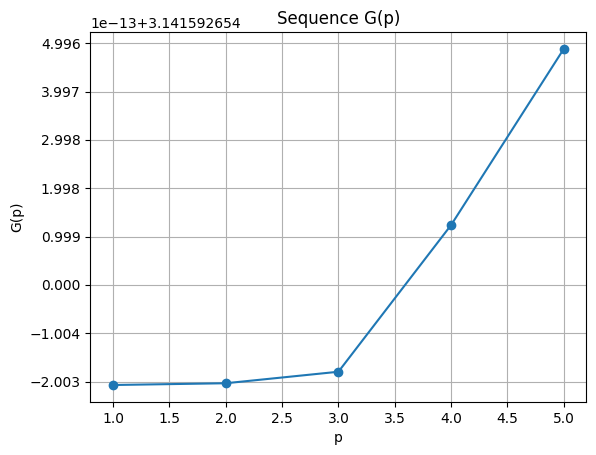

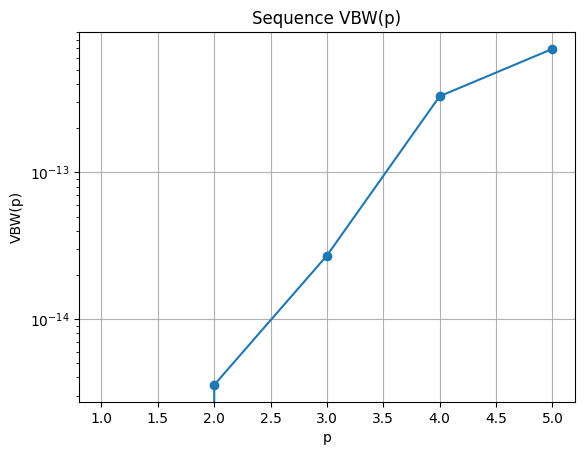

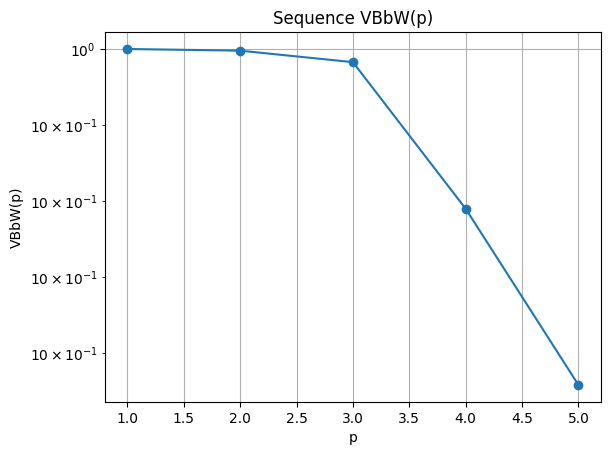

In [41]:
pi = np.pi
print(pi) # 15 decimal places

def f(n):
    g, vbw, vb_bw = [], [], []
    bw = 0
    b_bw = 0
    for p in range(1, n + 1):
        cur_pi = ( 1/p * ( 10**p * (1 + p*pi * 10**(-p) ) - 10**p) )  
        g.append(cur_pi)
        bw = abs(cur_pi - pi)
        b_bw = abs( abs(pi - bw) / pi)
        vbw.append(bw)
        vb_bw.append(b_bw)

    return g, vbw, vb_bw

g, vbw, vb_bw = f(5)
print(g)
plt.figure()
plt.plot(range(1, len(g) + 1), g, marker='o', linestyle='-')
plt.xlabel('p')
plt.ylabel('G(p)')
plt.title('Sequence G(p)')
plt.grid(True)
plt.show()

plt.figure()
plt.plot(range(1, len(vbw) + 1), vbw, marker='o', linestyle='-')
plt.xlabel('p')
plt.ylabel('VBW(p)')
plt.title('Sequence VBW(p)')
plt.grid(True)
plt.semilogy()
plt.show()

plt.figure()
plt.plot(range(1, len(vb_bw) + 1), vb_bw, marker='o', linestyle='-')
plt.xlabel('p')
plt.ylabel('VBbW(p)')
plt.title('Sequence VBbW(p)')
plt.grid(True)
plt.semilogy()
plt.show()